Aplly train split and develop a regression model to predict the sold price of players using imb381ipl2013.csv.

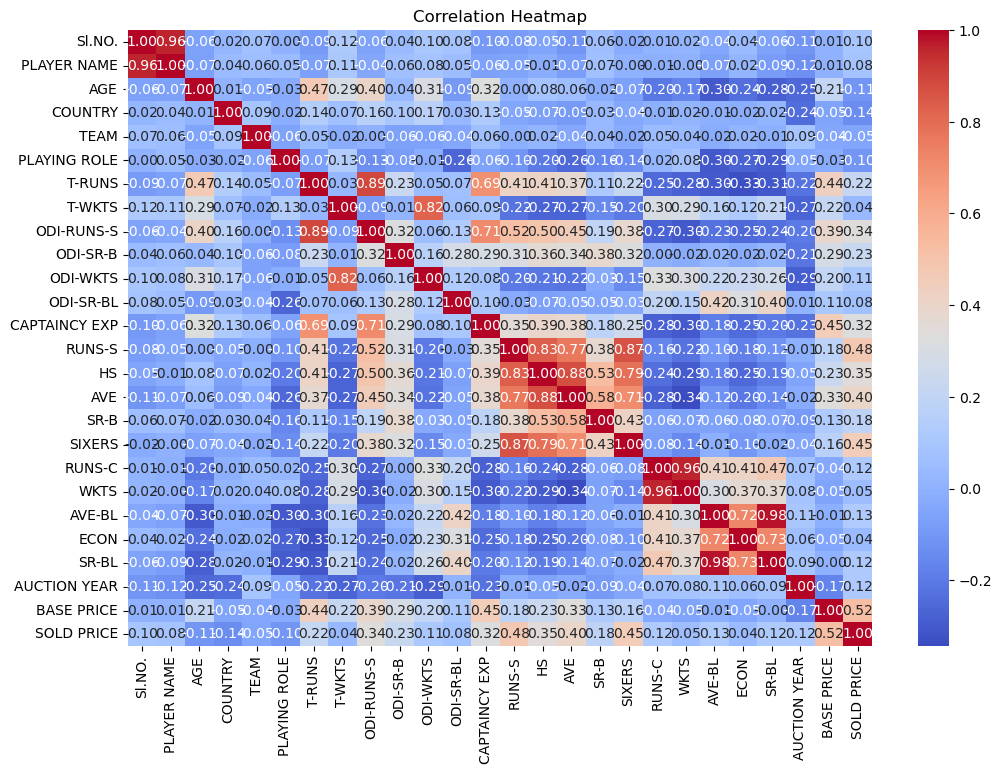

MSE for training data:  234263.48624414456
MSE for testing data:  307209.424048713


In [6]:
import numpy as numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv("IPL IMB381IPL2013.csv")

label_encoders={}
for column in data.select_dtypes(include='object').columns:
    le=LabelEncoder()
    data[column]=le.fit_transform(data[column])
    label_encoders[column]=le

X=data.drop(columns='SOLD PRICE')
y=data['SOLD PRICE']

correlation_matrix=data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


regression_model=LinearRegression()
regression_model.fit(X_train,y_train)

y_train_pred=regression_model.predict(X_train)
y_test_pred=regression_model.predict(X_test)
import numpy as np
rese_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
rese_test=np.sqrt(mean_squared_error(y_test,y_test_pred))

print("MSE for training data: ",rese_train)
print("MSE for testing data: ",rese_test)